# Домашнее задание. Pandas

In [81]:
import pandas as pd
df = pd.read_csv('data/tesla.csv');

1. Вывести все колонки из DataFrame

In [82]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

2. Посчитать среднюю цену закрытия акций Tesla, в периуд с открытия по 10.01.2012

In [83]:
from datetime import date
df[pd.to_datetime(df.Date) < pd.to_datetime('2012-01-10')].Close.mean()

25.649379816537472

3. Вывести график цены закрытия 

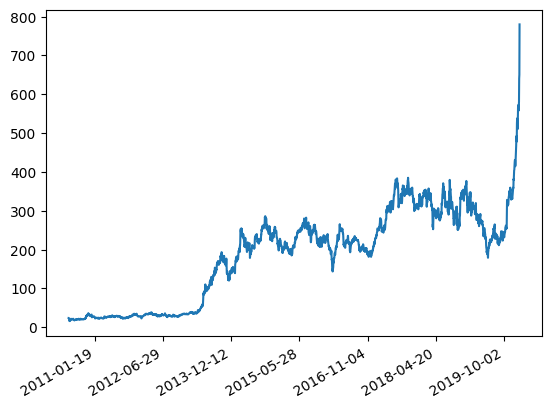

In [89]:
# Начните писать код тут
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.plot(df.Date, df.Close)
plt.gcf().autofmt_xdate()
plt.show()

4. Нормализация 

Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [85]:
# Начните писать код тут
xmin = df.Open.min()
xmax = df.Open.max()
xopen = (df.Open - xmin) / (xmax - xmin)
df.Open = xopen
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,0.004349,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,0.014676,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,0.013474,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,0.010433,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,0.005870,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,0.840012,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,0.850962,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,0.937237,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,0.948764,653.000000,632.520020,650.570007,650.570007,15719300


5. Что такое SMA (Simple Moving Average) с окном 12,15,30. 
Можно посмотреть внешние решения: 
- https://www.pythonpool.com/moving-average-python/   
- https://mrjbq7.github.io/ta-lib/

Алгоритм простого скользящего среднего (Simple Moving Average, SMA) используется для сглаживания временных рядов и выявления общих трендов или паттернов. Он вычисляет среднее значение ценового или другого показателя за определенный период времени и обновляет его по мере прохождения времени.
SMA особенно полезен при анализе финансовых данных, таких как цены акций, индексы рынка или объемы торговли. Он позволяет уменьшить шумы и краткосрочные колебания, чтобы выделить общий тренд. Это может помочь трейдерам и аналитикам принимать решения на основе долгосрочных тенденций, а не краткосрочных флуктуаций цен.
Принцип работы SMA заключается в вычислении среднего значения цены за определенный период времени (например, 10, 50 или 200 дней) путем сложения цен за этот период и деления на количество дней. Затем это среднее значение перемещается по времени, добавляя новые данные и удаляя старые, чтобы всегда отражать последние значения. Это создает "скользящее" среднее значение, которое отслеживает изменение средней цены во времени.
Преимуществом SMA является его простота и понятность. Он позволяет быстро оценить текущую ситуацию на рынке и определить основной тренд. Однако SMA может быть подвержен лагу, поскольку он реагирует на изменения цены только после того, как они произошли. Более сложные алгоритмы, такие как взвешенное скользящее среднее или экспоненциальное скользящее среднее, могут обладать большей чувствительностью к последним данным и меньшим лагом.
В целом, алгоритм простого скользящего среднего является полезным инструментом для анализа временных рядов и выявления общих трендов. Он применяется в различных областях, включая финансовые рынки, анализ данных и прогнозирование.

6. Построить график с ценой закрытия и посчитаным SMA 12,15,30

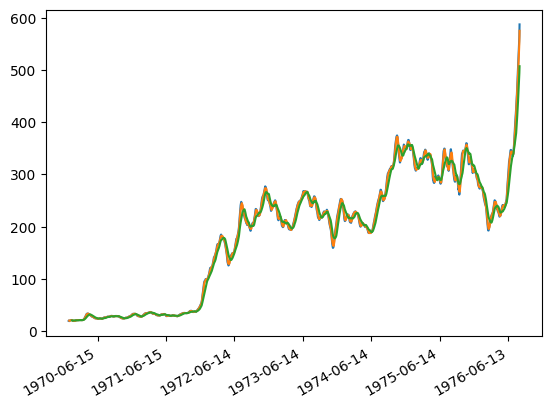

In [86]:
# Начните писать код тут
df.Close.rolling(window=12).mean().plot(), df.Close.rolling(window=15).mean().plot(), df.Close.rolling(window=30).mean().plot()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.gcf().autofmt_xdate()
plt.show()

7. Посмотрите на график и подумайте, о чем говорит SMA. Когда стоит начать покупать/продавать акции Tesla?

Акции нужнно покупать прямо сейчас, т.к. они резко растут